<a href="https://colab.research.google.com/github/AeroEng16/machine-learning-with-python-logistic-regression-3211129/blob/main/03_computerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial link - https://youtu.be/V_xro1bcAuA
https://learnpytorch.io

**Got to 15:51 in video**

## 0. Computer vision libraries in PyTroch

* `torchvision` consists of datasets, architectures and transformations for computer vision
* `torchvision.datasets` - get datasets and dataloading functions for computer vision
* `torchvision.models` - pre-trained computer vision models
* `torchvision.transforms` functions for manipulating your vision data to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a Python iterable over a dataset

In [2]:
import torchvision
import torch
from torch import nn
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)


2.1.0+cu121
0.16.0+cu121



## 1. Getting a dataset

The dataset if FashionMNIST from torchvision.datasets

In [3]:
#1. Setup training data

train_data = datasets.FashionMNIST(
              root="data",   # Where to download data to
              train=True,    # Do we want the training dataset?
              download=True, # Do we want to download it
              transform = ToTensor(), # How do we want to transform the data
              target_transform = None   # Do we want to transform the label/target?
            )


test_data = datasets.FashionMNIST(
              root="data",   # Where to download data to
              train=False,    # Do we want the training dataset?
              download=True, # Do we want to download it
              transform = ToTensor(), # How do we want to transform the data
              target_transform = None   # Do we want to transform the label/target?
            )

100%|██████████| 26421880/26421880 [00:02<00:00, 9739270.57it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 173276.38it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3145121.50it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6397711.70it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
# See the first training example

image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
# Check the shape



print(f" Image shape: {image.shape} => [color channels, height,width]")

print(f"Image label: {[k for k, v in class_to_idx.items() if v == label][0]}")


 Image shape: torch.Size([1, 28, 28]) => [color channels, height,width]
Image label: Ankle boot


#1.2 Visualise the data

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

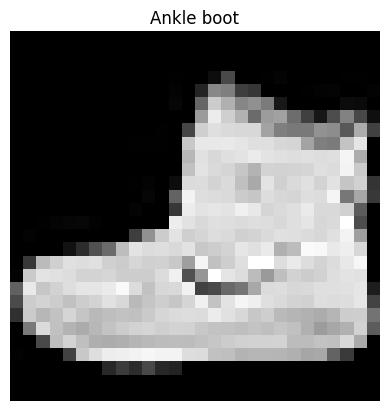

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]

print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze(),cmap="gray")
plt.title([k for k, v in class_to_idx.items() if v == label][0])
plt.axis(False)

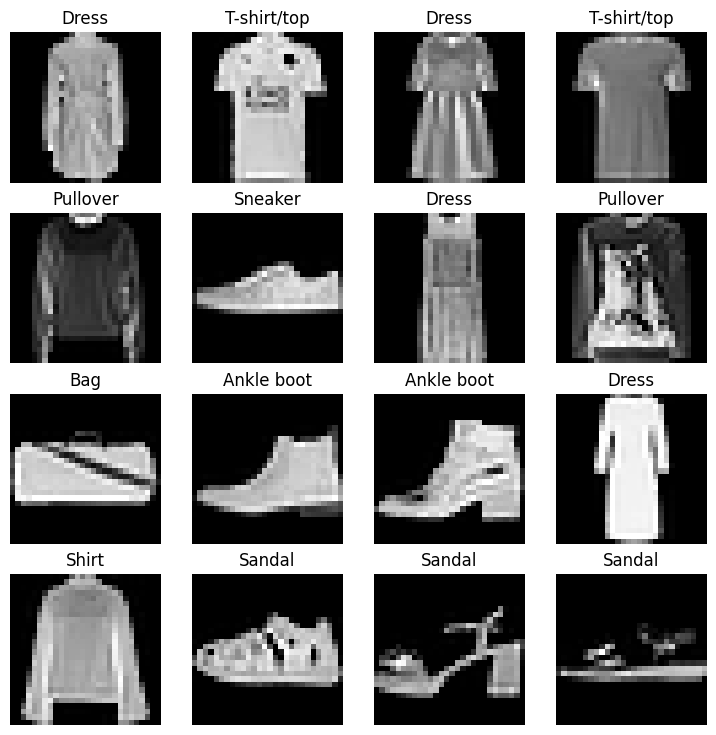

In [10]:
# PLot random images

#torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))

rows,cols = 4,4

for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title([k for k, v in class_to_idx.items() if v == label][0])
  plt.axis(False)

##2. Prepare Dataloader

Dataloader turns our dataset into a python iterable. Specifically, we want to turn out data into batches (or mini-batches).Why?

1. It is more computationally efficient. Computer hardware may struggle to deal with large datasets at the same time. SO we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.



In [11]:
from torch.utils.data import DataLoader
# Setup the batch size hyperparameter

BATCH_SIZE = 32

# Turn datasets into iterables (batches)

train_dataloader = DataLoader(
                              dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True
                              )

test_dataloader = DataLoader(
                              dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle=False
                              )

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c30a2647580>,
 <torch.utils.data.dataloader.DataLoader at 0x7c30a2645180>)

In [12]:
# Check properties of dataloaders

print(f"DataLoaders: {train_dataloader,test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c30a2647580>, <torch.utils.data.dataloader.DataLoader object at 0x7c30a2645180>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:
# Check what is inside the training dataloader

train_features_batch,train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

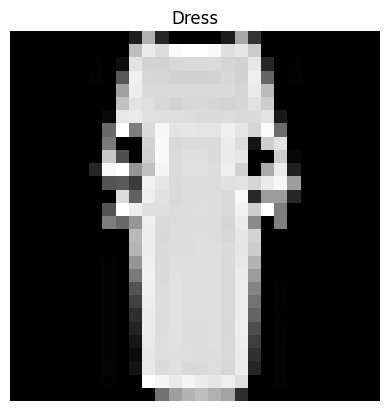

In [14]:
# Show a sample

#torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label= train_features_batch[random_idx],train_labels_batch[random_idx]

plt.imshow(img.squeeze(),cmap="gray")
plt.title([k for k, v in class_to_idx.items() if v == label][0])
plt.axis(False)


## 3. Model 0 Build a baseline model

When starting to build a series of machine learning modelling experiments, its best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models.

In other words start simply and complexity when necessary.

In [15]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample

x = train_features_batch[0]
print(f"Shape before flattening :{x.shape} -> [color channels, height, width]")

output = flatten_model(x)

print(f"Shape after flattening: {output.shape} -> [color channels, height*width]")

Shape before flattening :torch.Size([1, 28, 28]) -> [color channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color channels, height*width]


In [16]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )
  def forward(self,x):
      return self.layer_stack(x)

In [17]:
torch.manual_seed(42)

#setup Model with input params

model0 = FashionMNISTModelV0(input_shape=784,   #this is 28x28
                             hidden_units=10,
                             output_shape=len(class_to_idx.keys()))

model0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_X = torch.rand([1,1,28,28])
model0(dummy_X)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimiser and evaluation metrics

* Loss functions - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimiser - our optimiser will be `torch.optim.SGD()`
* Evaluation metric - since we're working on a classification problem, lets use accuracy as our evaluation metric.

In [19]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  pass
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
      f.write(request.content)

In [20]:
#Import accuracy metrics
from helper_functions import accuracy_fn

In [21]:
#Setup loss function and optimiser
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params=model0.parameters(),
                            lr = 0.1,
                            )

### 3.2 Create a function to time our experiments

ML is very experimental. Two of the main things you'll offten want to track are:
1. Your models performance
2. Speed

In [22]:
from timeit import default_timer as timer
def print_train_time(Start:float,
                     end:float,
                     device:torch.device=None):
  """ Print difference between start and end time."""
  total_time = end-Start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [23]:
start_time = timer()
end_time = timer()

print_train_time(Start=start_time,end=end_time,device="cpu")

Train time on cpu: 0.000 seconds


6.561200001442558e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it all.

In [24]:
# Import tqdm for process bar

from tqdm.auto import tqdm

# Set the seed and start timer

torch.manual_seed(42)

train_time_start_on_cpu = timer()

#Set the number of epochs (keep it small for faster training time)

epochs = 3

# Create training and test loop

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training

  train_loss = 0

  # Add a loop to loop through the training batches

  for batch, (X,y) in enumerate(train_dataloader):
    model0.train()
    # 1. Forward pass
    y_pred=model0(X)
    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss +=loss   #accumulate training loss
    # 3. Zero grad
    optimiser.zero_grad()
    # 4. Loss backwards
    loss.backward()
    # 5. Optimiser step
    optimiser.step()  # Optimizer will update model parameters once per batch rather than once per epoch
    # Print out whats happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /=len(train_dataloader)

  ## Testing

  test_loss, test_acc = 0, 0
  model0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model0(X_test)

      #2.Calcualte the loss accumulatively
      test_loss+=loss_fn(test_pred,y_test)

      #3 Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)
    # Calculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

  # Print out whats happening
  print(f"\nTrain Loss: {train_loss:.4f} | Test loss: {test_loss: .4f}, Test acc: {test_acc: .4f}")

# Calculate training time

train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(Start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=str(next(model0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.5904 | Test loss:  0.5095, Test acc:  82.0387
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4763 | Test loss:  0.4799, Test acc:  83.1969
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss: 0.4550 | Test loss:  0.4766, Test acc:  83.4265
Train time on cpu: 27.697 seconds


In [25]:
next(model0.parameters()).device

device(type='cpu')

### 4. Make predictions and get model0 results


In [26]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ Returns a dictionary of model predicting on dataloader """
  loss,acc= 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make predictions
      y_pred=model(X)
      # Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    # Scale the loss and acc to find average per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name":model.__class__.__name__, ## only works when model was created with a class
            "model_loss":loss.item(),
            "model_acc": acc
            }
# Calculate model0 results on test dataset

model0_results = eval_model(model=model0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [27]:
torch.cuda.is_available()

True

In [28]:
# Setup device-agnostic doe

import torch
device="cuda" if torch.cuda.is_available() else "cpu"


## 6.1 Build Model 1: Non linear model

In [29]:
# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), #flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)


In [30]:
# Create an instance of Model1
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784,  # this is the output of our flatten layer after our 28x28 image foes in
                              hidden_units=10,
                              output_shape=len(class_to_idx.keys())
                              ).to(device)

### 6.1 Create loss, optimser and eval metrics
     

In [31]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimiser = torch.optim.SGD(params=model_1.parameters(),    # tries to update our model parameters to minimise loss
                            lr = 0.1)


In [32]:
def train_step(model:torch.nn.Module,
              dataLoader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              optimiser:torch.optim.Optimizer,
              accuracy_fn,
              device:torch.device = device):
  """
  Performs training step with model trying to learn on dataloader
  """

  ### Put model into training mode
  model.train()

  ### Training

  train_loss, train_acc = 0, 0

  # Add a loop to loop through the training batches

  for batch, (X,y) in enumerate(dataLoader):
    X,y = X.to(device),y.to(device)
    # 1. Forward pass (outputs raw logits from model)
    y_pred=model(X)
    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss +=loss   #accumulate training loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
    # 3. Zero grad
    optimiser.zero_grad()
    # 4. Loss backwards
    loss.backward()
    # 5. Optimiser step
    optimiser.step()  # Optimizer will update model parameters once per batch rather than once per epoch

  # Divide total train loss by length of train dataloader
  train_loss /=len(dataLoader)
  train_acc /= len(dataLoader)

  print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")

In [33]:
def test_step(model: torch.nn.Module,
              dataLoader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
  """Function to evaluate performance of trained model"""
  ## Testing

  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in dataLoader:
      X_test,y_test=X_test.to(device),y_test.to(device)
      # 1. Forward pass
      test_pred = model(X_test)

      #2.Calcualte the loss accumulatively
      test_loss+=loss_fn(test_pred,y_test)

      #3 Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(dataLoader)
    # Calculate the test accuracy average per batch
    test_acc /= len(dataLoader)

  # Print out whats happening
  print(f"\nTest loss: {test_loss: .4f}, Test acc: {test_acc: .4f}")


In [34]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_on_gpu=timer()

#Set epochs
epochs = 3

# Create a optimisation and evaluation loop using train_step and test_step

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n------")
  train_step(model=model_1,
             dataLoader=train_dataloader,
             loss_fn=loss_fn,
             optimiser = optimiser,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            dataLoader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

  train_time_end_on_gpu=timer()

  trainingTime = print_train_time(Start=train_time_start_on_gpu,
                                  end=train_time_end_on_gpu,
                                  device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
------
Train loss: 1.0920 | Train acc: 61.34%

Test loss:  0.9564, Test acc:  64.9960
Train time on cuda: 10.640 seconds
Epoch: 1 
------
Train loss: 0.7810 | Train acc: 71.93%

Test loss:  0.7223, Test acc:  73.9117
Train time on cuda: 20.609 seconds
Epoch: 2 
------
Train loss: 0.6703 | Train acc: 75.94%

Test loss:  0.6850, Test acc:  75.0200
Train time on cuda: 30.645 seconds


In [35]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
  """ Returns a dictionary of model predicting on dataloader """
  loss,acc= 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Make device agnostics
      X,y=X.to(device),y.to(device)
      # Make predictions
      y_pred=model(X)
      # Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    # Scale the loss and acc to find average per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name":model.__class__.__name__, ## only works when model was created with a class
            "model_loss":loss.item(),
            "model_acc": acc
            }


In [36]:
# Get model 1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [37]:
model0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

### Model 2: Convolutional Neural Network

* https://poloclub.github.io/cnn-explainer/ to understand basic background to CNN's

In [47]:
# Create Conv Net

class FashionMNISTModelV2(torch.nn.Module):
  """
  Model architecture that replicates the TinyVGG model from CNN explainer
  """

  def __init__(self,input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels = hidden_units,
                  kernel_size=(3,3),
                  stride=1,
                  padding=1),  # kernel size, stride, padding are hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=(3,3),
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2)))
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=(3,3),
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=(3,3),
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2)))
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,     # trick to calculating this
                  out_features=output_shape))
  def forward(self,x):
    x = self.conv_block1(x)
    #print(x.shape)
    x = self.conv_block2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x






In [48]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,    # number of color channels
                              hidden_units=10,
                              output_shape=len(class_to_idx.keys())).to(device)

### 7.1 Stepping through nn.Conv2D

In [49]:
torch.manual_seed(42)

# Create a batch of iamages

images = torch.randn(size=(32,3,64,64))
test_image=images[0]
print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image \n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [50]:
# Cerate a single Conv2D layer
torch.manual_seed(42)
conv_layers = nn.Conv2d(in_channels=3,
                        out_channels=10,
                        stride=1,
                        kernel_size=(3,3),
                        padding=1)

# Pass the data through the convolustion layer

convOutput=conv_layers(test_image)
print(convOutput.shape)
print(test_image.shape)

torch.Size([10, 64, 64])
torch.Size([3, 64, 64])


### 7.2 Stepping through nn.MaxPool2D


In [51]:
# Print out image shapes

print(f"Tst image original shape: {test_image.shape}")
print(f"Test image unsqueezed shape: { test_image.unsqueeze(0).shape}")

# Dummy max pool layer

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv_layer = conv_layers(test_image)
print(f"Test image shape through conv layer: {test_image_through_conv_layer.shape}")

test_image_through_conv_layer_and_max_pool= max_pool_layer(test_image_through_conv_layer)
print(f"Test image shape through conv layer and max pool: {test_image_through_conv_layer_and_max_pool.shape}")

Tst image original shape: torch.Size([3, 64, 64])
Test image unsqueezed shape: torch.Size([1, 3, 64, 64])
Test image shape through conv layer: torch.Size([10, 64, 64])
Test image shape through conv layer and max pool: torch.Size([10, 32, 32])


In [52]:
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_to_idx.keys())).to(device)



In [53]:
model_2(image.unsqueeze(0).to(device))

tensor([[-0.0035,  0.0494, -0.0584,  0.0623, -0.0372, -0.0318, -0.0249,  0.0421,
          0.0140, -0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.3 Setup of loss function and optimiser for CNN



In [54]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model_2.parameters(),
                            lr = 0.1)

In [60]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2=timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_2,
             dataLoader = train_dataloader,
             optimiser=optimiser,
             loss_fn = loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
             dataLoader = test_dataloader,
             loss_fn = loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(Start=train_time_start_model_2,
                                              end = train_time_end_model_2,
                                              device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.2946 | Train acc: 89.44%

Test loss:  0.3114, Test acc:  88.8578
Train time on cuda: 12.000 seconds
Epoch: 1
---------
Train loss: 0.2836 | Train acc: 89.80%

Test loss:  0.2961, Test acc:  89.4669
Train time on cuda: 23.657 seconds
Epoch: 2
---------
Train loss: 0.2730 | Train acc: 90.23%

Test loss:  0.2907, Test acc:  89.4169
Train time on cuda: 35.691 seconds
Epoch: 3
---------
Train loss: 0.2655 | Train acc: 90.32%

Test loss:  0.2933, Test acc:  89.6366
Train time on cuda: 47.984 seconds
Epoch: 4
---------
Train loss: 0.2593 | Train acc: 90.58%

Test loss:  0.2919, Test acc:  89.5867
Train time on cuda: 59.890 seconds
Epoch: 5
---------
Train loss: 0.2551 | Train acc: 90.66%

Test loss:  0.2981, Test acc:  89.2772
Train time on cuda: 71.920 seconds
Epoch: 6
---------
Train loss: 0.2493 | Train acc: 90.99%

Test loss:  0.2810, Test acc:  89.8462
Train time on cuda: 84.567 seconds
Epoch: 7
---------
Train loss: 0.2448 | Train acc: 91.02%

Test loss:

In [61]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [62]:
print(model0_results)
print(model_1_results)
print(model_2_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663888335227966, 'model_acc': 83.42651757188499}
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6850008964538574, 'model_acc': 75.01996805111821}
{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.28196772933006287, 'model_acc': 89.79632587859425}


### 8 Compare model results and training time

In [64]:
import pandas as pd
compare_results = pd.DataFrame([model0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.281968,89.796326


In [66]:
# Add training time to results comparison

compare_results["training_time"]=[total_train_time_model_0,trainingTime,total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,27.697241
1,FashionMNISTModelV1,0.685001,75.019968,30.645220
2,FashionMNISTModelV2,0.281968,89.796326,137.959874


Text(0, 0.5, 'model')

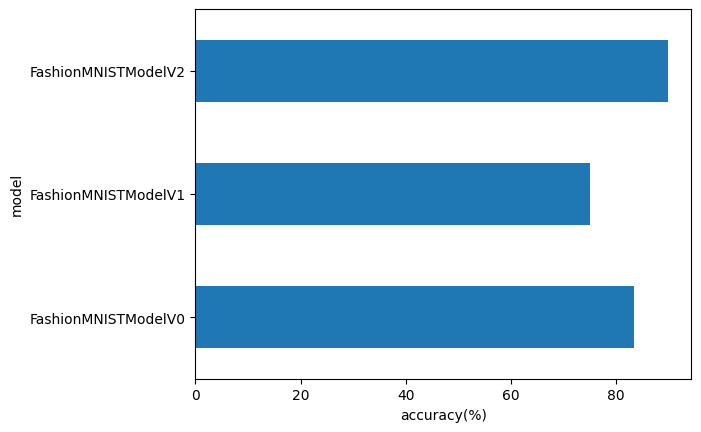

In [67]:
# Visualise Results

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

## Make and evaluate random predictions with best model

In [69]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  """Make predictions using trained model and plot results"""
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:

      #Prepare the sample (add a batch dimension and pass to target device)
      sample=torch.unsqueeze(sample,dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      #Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      # Get pred prob off gpu for futher calculations
      pred_probs.append(pred_prob.to("cpu"))

  # Stack pred_probs to turn list into tensor
  return torch.stack(pred_probs)

Text(0.5, 1.0, 'Sandal')

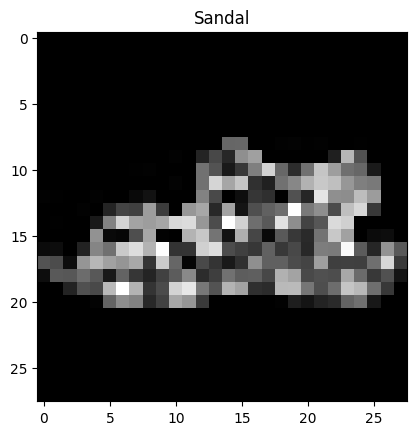

In [101]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape

test_samples[0].shape
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title([k for k, v in class_to_idx.items() if v == test_labels[0]][0])

In [102]:
# Make predictions

pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device=device)

# View first two prediction probabilities

pred_probs[:2]

tensor([[3.7543e-07, 5.8126e-08, 1.9608e-08, 1.3731e-06, 6.9883e-07, 9.9979e-01,
         1.6106e-06, 4.2113e-06, 1.5122e-06, 2.0501e-04],
        [3.3851e-04, 1.8757e-08, 2.5199e-02, 5.4897e-06, 1.6202e-02, 1.1404e-07,
         9.5825e-01, 5.9645e-08, 7.6024e-07, 4.1373e-08]])

In [103]:
# Convert prediction probabilities to labels

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 6, 6, 3, 1, 2, 3, 6])

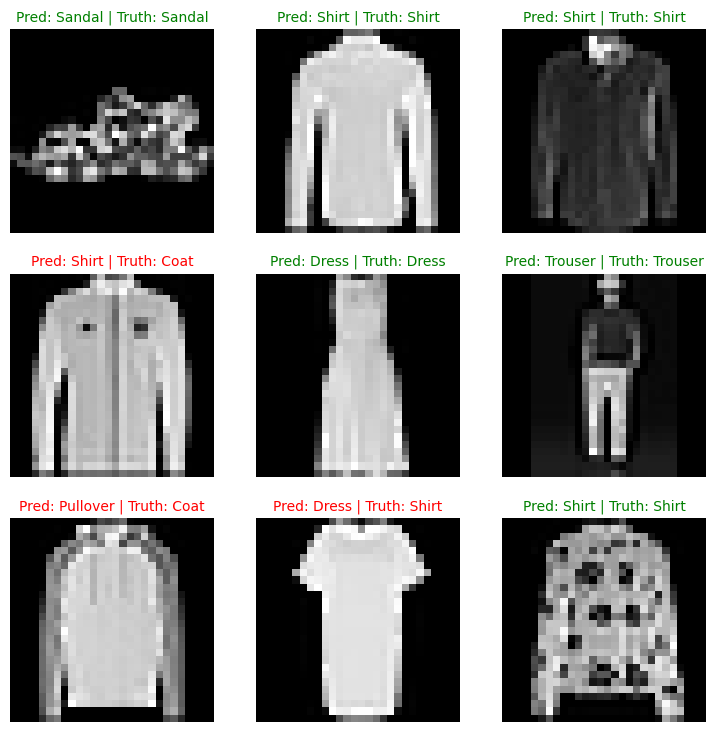

In [104]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  #Create subplot
  plt.subplot(nrows,ncols,i+1)

  #Plot target image
  plt.imshow(sample.squeeze(),cmap="gray")

  #Find prediction
  pred_label = [k for k, v in class_to_idx.items() if v == pred_classes[i]][0]
  truth_label = [k for k, v in class_to_idx.items() if v == test_labels[i]][0]

  title_text=f"Pred: {pred_label} | Truth: {truth_label}"

  #Check equality of truth and pred label and color title appropriately

  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)

## 10. Confusion Matrix for further prediction evaluation

1. Make predictions of trained model on dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlextend.plotting.plot_confusion_matrix()`

In [109]:
import mlxtend

# import TQDM.auto

from tqdm.auto import tqdm

# Make predictions across full test dataset

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions ..."):
    # Send data and target to target device
    X,y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits into preditction probabilities into pred labels
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    # Put prediction on cpu
    y_preds.append(y_pred.to("cpu"))
# Concatenate list of predictions into tensor
y_preds_tensor=torch.cat(y_preds)
len(y_preds_tensor)

Making predictions ...:   0%|          | 0/313 [00:00<?, ?it/s]

10000

In [118]:
# See if required packages are installed and if not install them

try:
  import torchmetrics, mlextend
  print(f"mlexetend version: {mlextend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]>=19, "mlextend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"MLxtend version: { mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.4 MB/s eta 0:00:00
MLxtend version: 0.22.0


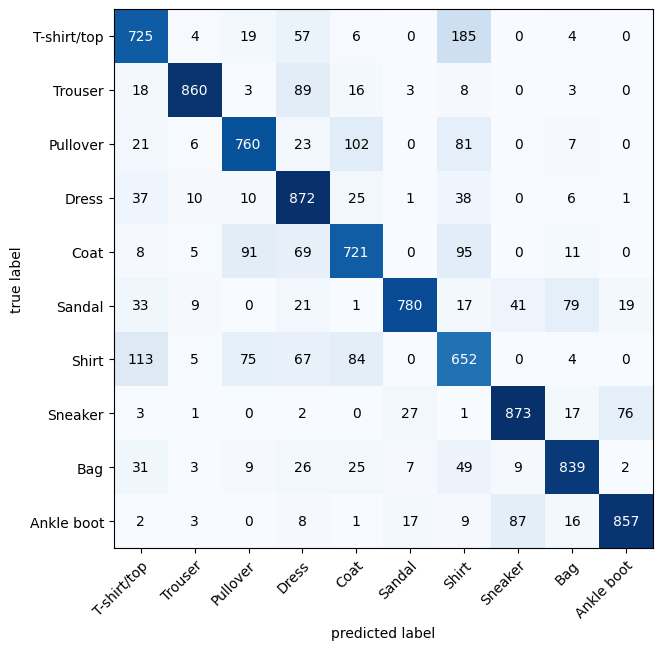

In [127]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. Setup confusion matrix instance and compare predictions to targets

confmat = ConfusionMatrix(task='multiclass',num_classes = len(class_to_idx.items()))
confmat_tensor = confmat(y_preds_tensor,
                         test_data.targets)

# 3. Plot confusion matrix

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),  # matplotlib likes working with numpy
    class_names = [k for k, v in class_to_idx.items()],
    figsize=(10,7)
)


## 11. Save and load best performing model

In [130]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create a model save path

MODEL_NAME = "03_pytorch_CompVision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Svaing model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Svaing model to: models/03_pytorch_CompVision_model_2.pth


In [136]:
# Create a new instance
torch.manual_seed(42)
model_2_loaded = FashionMNISTModelV2(input_shape=1,
                                hidden_units = 10,
                                     output_shape=len(class_to_idx.items())
                                )

#Load in the saved state_dict

model_2_loaded.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
model_2_loaded.to(device)

FashionMNISTModelV2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [137]:
torch.manual_seed(42)
model_2_loaded_results = eval_model(model=model_2_loaded,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [141]:
compare_results = pd.DataFrame([model0_results,
                                model_1_results,
                                model_2_results,
                                model_2_loaded_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.281968,89.796326
3,FashionMNISTModelV2,0.281968,89.796326


In [139]:
model_2_loaded_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.28196772933006287,
 'model_acc': 89.79632587859425}

In [140]:
# Check if values are close

torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(model_2_loaded_results["model_loss"]))

tensor(True)